In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import csv
import gmaps

# Google developer API key
from config1 import gkey

# Configure gmaps
gmaps.configure(api_key = gkey)

# Name of the CSV file
#file = 'raleigh_grocery_output_data.csv'
file2 = 'raleigh_restaurant_output_data.csv'
# file3 = 'asheville_raleigh_restaurants.csv'
# file4 = 'raleigh_data.csv'
# file5 = 'asheville_data.csv'
# file6 = 'Hotels.csv'
# file7 = 'restaurants_new_data.csv'

# Read csv into pandas dataframe with a correct encoding 
#grocery = pd.read_csv(file, encoding="ISO-8859-1")
restaurant = pd.read_csv(file2, encoding="ISO-8859-1")
# restaurants = pd.read_csv(file3, encoding="ISO-8859-1")
# hotel_travel = pd.read_csv(file6, encoding="ISO-8859-1")
# restaurantsp = pd.read_csv(file7, encoding="ISO-8859-1")

In [2]:
# Check for missing information
restaurant.count()

City         1101
Name         1101
Review       1101
Zip_codes    1098
Rating       1101
Price        1101
Lat          1101
Long         1101
Title        1101
dtype: int64

In [3]:
restaurantp = restaurant
# Drop all rows with missing information
restaurantp = restaurantp.dropna(how='any')
restaurantp.count()

City         1098
Name         1098
Review       1098
Zip_codes    1098
Rating       1098
Price        1098
Lat          1098
Long         1098
Title        1098
dtype: int64

In [4]:
# check for data type
restaurantp.dtypes


City          object
Name          object
Review         int64
Zip_codes    float64
Rating       float64
Price         object
Lat          float64
Long         float64
Title         object
dtype: object

In [6]:
new_restaurantp = restaurantp
# print dataframe
new_restaurantp.head()

,City,Name,Review,Zip_codes,Rating,Price,Lat,Long,Title
0,asheville,Sunny Point Café,1523,28806.0,4.5,$$,35.578590,-82.588850,Southern
1,asheville,Cúrate,1408,28801.0,4.5,$$$,35.594200,-82.551620,Tapas Bars
2,asheville,Tupelo Honey,2102,28801.0,4.5,$$,35.594671,-82.554889,Southern
3,asheville,Biscuit Head,1151,28801.0,4.5,$,35.581281,-82.551528,Cafes
4,asheville,White Duck Taco Shop,1226,28801.0,4.5,$,35.594012,-82.572271,American (New)


In [7]:
# Delete extraneous column
#del ['FIELD8']
#df.head()

#reduced_grocery = grocery[["alias", "name", "price", "rating", "review_count"]]
#reduced_grocery.head()

new_restaurant = restaurant_rd
# print dataframe
new_restaurant.head()



NameError: name 'restaurant_rd' is not defined

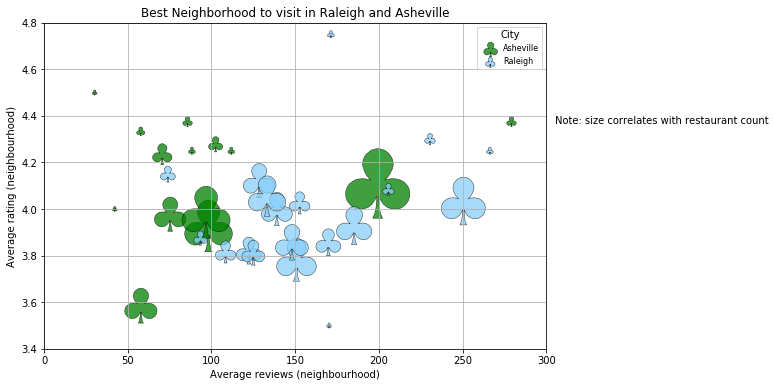

In [8]:
#Split up our data into groups based upon 'city' and 'type' then perform calculations
restaurant_type = new_restaurantp.groupby(["City", "Zip_codes"]).agg({"Rating":["mean"], "Review":["mean"], "Zip_codes":["count"]})
                                  
#name the columns of the calculated values
restaurant_type.columns = ["Ave rating", "Ave review", "Zip codes"]
restaurant_type

# # #linestyle='dashed', linewidth=0.5,
# # # Filter the data so that only those in one city are in a DataFrame
# asheville_df = restaurant_type.loc[restaurant_type["City"] == "asheville", :]
# raleigh_df = restaurant_type.loc[restaurant_type["City"] == "raleigh", :]

#Make a variable based on type and store a 'each type' in it
asheville_id = "asheville"
raleigh_id = "raleigh"


#Collect the trips of the 'type id of type' above
asheville_type = restaurant_type.loc[asheville_id]
raleigh_type = restaurant_type.loc[raleigh_id]


# # X and y cordinates for asheville
y_axis = asheville_type["Ave rating"]
x_axis = asheville_type["Ave review"]
z_axis = asheville_type["Zip codes"]

# # X and Y coordinates for raleigh
y = raleigh_type["Ave rating"]
x = raleigh_type["Ave review"]
z = raleigh_type["Zip codes"]


plt.figure(figsize=(9,6))
# # Build the scatter plots for each city 
a=plt.scatter(x_axis, y_axis, facecolors="green", edgecolors="black", linewidth=0.5,
              s=z_axis*30, alpha=0.75, marker=r'$\clubsuit$')
b=plt.scatter(x, y, facecolors="lightskyblue", edgecolors="black", linewidth=0.5,
             s=z*30, alpha=0.75, marker=r"$\clubsuit$")

# # Incorporated other graph properties
#The y limits of our scatter plot is 0 to 1
plt.ylim(3.4, 4.8)
# #The x limits of our scatter plot is 0 to 100
plt.xlim(0, 300)
# Create a title, x label, and y label for our chart
plt.title("Best Neighborhood to visit in Raleigh and Asheville")
plt.xlabel("Average reviews (neighbourhood)")
plt.ylabel("Average rating (neighbourhood)")

# Create a legend
plt.text(305, 4.4, 'Note: size correlates with restaurant count', horizontalalignment='left', verticalalignment='top')
g= plt.legend((a,b), ("Asheville", "Raleigh"), title = "City", fontsize = 8, markerscale = 0.3)


# Incorporate a text label regarding circle size
#fig.tight_layout()
plt.grid()


# Save Figure # marker="o"
#plt.savefig("../Images/Pyber1.png") 

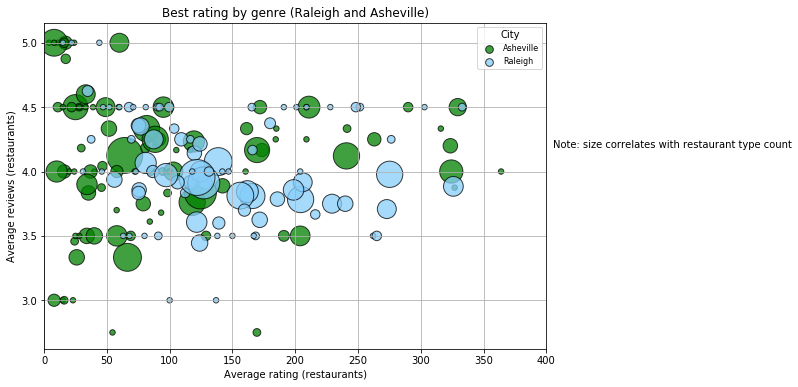

In [9]:
#Split up our data into groups based upon 'city' and 'type' then perform calculations
restaurant_typea = new_restaurantp.groupby(["City", "Title"]).agg({"Rating":["mean"], "Review":["mean"], "Title":["count"], "Zip_codes":["count"]})
                                  
#name the columns of the calculated values
restaurant_typea.columns = ["Ave rating", "Ave review", "Total Restaurants", "Zip_code"]
#restaurant_typea
# substring = "Price"
# for string in restaurant_typea:
#     yes = string.count().head
#     yes

# # # #linestyle='dashed', linewidth=0.5,
# # # # Filter the data so that only those in one city are in a DataFrame
# # asheville_df = restaurant_type.loc[restaurant_type["City"] == "asheville", :]
# # raleigh_df = restaurant_type.loc[restaurant_type["City"] == "raleigh", :]



#Make a variable based on type and store a 'each type' in it
asheville_id = "asheville"
raleigh_id = "raleigh"


#Collect the trips of the 'type id of type' above
asheville_type = restaurant_typea.loc[asheville_id]
raleigh_type = restaurant_typea.loc[raleigh_id]


# # X and y cordinates for asheville
y_axis = asheville_type["Ave rating"]
x_axis = asheville_type["Ave review"]
z_axis = asheville_type["Total Restaurants"]
c= asheville_type["Zip_code"]

# # X and Y coordinates for raleigh
y = raleigh_type["Ave rating"]
x = raleigh_type["Ave review"]
z = raleigh_type["Total Restaurants"]
d= raleigh_type["Zip_code"]

plt.figure(figsize=(9,6))
# # Build the scatter plots for each city 
e=plt.scatter(x_axis, y_axis, facecolors="green", edgecolors="black", linewidth=1,
             s=d*30, alpha=0.75, marker="o")
f=plt.scatter(x, y, facecolors="lightskyblue", edgecolors="black", linewidth=1,
             s=d*30, alpha=0.75, marker="o")

# # Incorporated other graph properties
# #The y limits of our scatter plot is 0 to 1
# plt.ylim(19, 44)
# #The x limits of our scatter plot is 0 to 100
plt.xlim(0, 400)
# Create a title, x label, and y label for our chart
plt.title("Best rating by genre (Raleigh and Asheville)")
plt.xlabel("Average rating (restaurants)")
plt.ylabel("Average reviews (restaurants)")

# Create a legend
plt.text(405, 4.25, 'Note: size correlates with restaurant type count', horizontalalignment='left', verticalalignment='top')
plt.legend((e,f), ("Asheville", "Raleigh"), title = "City", fontsize = 8, markerscale = .3)

# Incorporate a text label regarding circle size

plt.grid()
# Save Figure # marker="o",  r'$\clubsuit$'
#plt.savefig("../Images/Pyber1.png") 

In [10]:
# Filter the data so that only those with 5 rating are in a DataFrame
rest_rating = new_restaurantp.loc[new_restaurantp["Rating"] == 5, :]


# Store latitude and longitude in locations
locations = rest_rating[["Lat", "Long"]]

# Fill NaN values and convert to float
rating = rest_rating["Rating"].astype(float)

# # Plot Heatmap
# fig = gmaps.figure()

# # Create heat layer
# heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)


# # Add layer
# fig.add_layer(heat_layer)

# # Display figure
# fig


In [11]:

# Filter the data so that only those with 5 rating are in a DataFrame
rest_rating = new_restaurantp.loc[new_restaurantp["Rating"] == 5, :]


# Store latitude and longitude in locations
locations = rest_rating[["Lat", "Long"]]

# Fill NaN values and convert to float
rating = rest_rating["Rating"].astype(float)

# # Plot Heatmap
# fig = gmaps.figure()

# # Create heat layer
# heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
#                                  dissipating=False, max_intensity=10,
#                                  point_radius=1)


# # Add layer
# fig.add_layer(heat_layer)

# # Display figure
# fig



In [12]:
# Customize the size of the figure
figure_layout = {
    'width': '700px',
    'height': '600px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [13]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…

In [14]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='600px', margin='0 auto 0 auto', padding='1px', wi…